# CREDIT CARD FRAUD DETECTION

In [1]:
import pandas as pd

In [6]:
#loading dataset to the notebook
dataframe = pd.read_csv("card_transdata.csv")

In [7]:
#preview of the first 5 rows of the dataset
top_five = dataframe.head(5)
top_five

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


### Data Understanding

In [8]:
#Function to check the number of rows and columns in the dataset
def shape_of(data):
    rows, columns = data.shape
    print(f"This dataset has {columns} columns and {rows} rows")

In [9]:
shape_of(dataframe)

This dataset has 8 columns and 1000000 rows


In [10]:
# Function to check information, null and datatypes 
def information_of(data):
    return data.info()


In [11]:
information_of(dataframe)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


This dataset has 8 columns so there is no need to check for columns or to check for domain knowledge because the variables are easy to explain.

### Feature selection

> Because this is a machine learning project instead of selecting and working on variables that do not affect the dependent variables we perform feature selection first to choose the features that impact fraud.

In [12]:
# import libraries from sklearn to use for feature selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [13]:
#Split the data in to the target(dependent) and predictor(independent) variables.
X = dataframe.drop("fraud", axis=1)
y = dataframe["fraud"]

In [14]:
#Split the data into training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 29)
rfc= RandomForestClassifier(random_state=29)
rfc.fit(X_train,y_train)
feature_importance = pd.Series(rfc.feature_importances_,index=X.columns).sort_values(ascending=False)
print(feature_importance)

ratio_to_median_purchase_price    0.522565
online_order                      0.179292
distance_from_home                0.133756
used_pin_number                   0.060114
used_chip                         0.055498
distance_from_last_transaction    0.042845
repeat_retailer                   0.005930
dtype: float64


In [21]:
#split data to remain with important features
important_features = dataframe[["ratio_to_median_purchase_price", "online_order", "distance_from_home","used_pin_number","fraud"]]

Use previous functions to preview the dataset

In [22]:
#checking for the shape of the data
shape_of(important_features)

This dataset has 5 columns and 1000000 rows


In [23]:
#checking the information of the dataset
information_of(important_features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   ratio_to_median_purchase_price  1000000 non-null  float64
 1   online_order                    1000000 non-null  float64
 2   distance_from_home              1000000 non-null  float64
 3   used_pin_number                 1000000 non-null  float64
 4   fraud                           1000000 non-null  float64
dtypes: float64(5)
memory usage: 38.1 MB


There are no null data and the datatypes are correct so we will just check for duplicates as our data cleaning,

In [24]:
def checking_duplicates(data):
    return data.duplicated().sum()

In [25]:
checking_duplicates(important_features)

0

No duplicates so the data is ready for analysis

## Univariate analysis

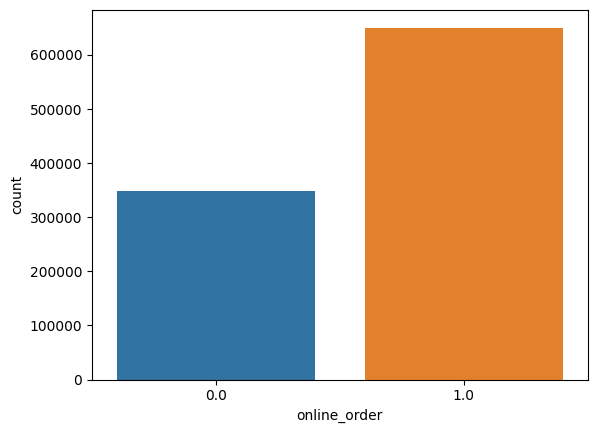

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='online_order', data=important_features)
plt.show()